# PROYEK MATAKULIAH DATA MINING
## Regression Problem from Case and Cost Prediction using Random Forest
### KELOMPOK 4
### 12S18020 - Dita L. Sastri Sihombing
### 12S18029 - Estomihi Rascana Sirait
### 12S18061 - Angela Friscilia Simamora

### Data Understanding

#### Mengumpulkan Data

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
casecostprediction = pd.read_csv('D:/Materi Kuliah/Jupyter Notebook/Proyek 4 DAMI/Data/case_cost_prediction_train.csv')

#### Menelaah Data

In [3]:
casecostprediction

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,57967,2019-03-01 00:00:00,241,40,157213,0,0,1,0,0,...,0,0,0,0,0,0,0,0,410,3.443332e+06
57967,57968,2019-09-01 00:00:00,338,30,402173,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8272,2.128621e+05
57968,57969,2016-06-01 00:00:00,241,40,99401,0,0,1,0,0,...,0,0,0,0,0,0,0,0,294,3.028611e+06
57969,57970,2018-01-01 00:00:00,147,40,509495,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1983,3.629365e+06


In [4]:
casecostprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

In [5]:
casecostprediction.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


#### Analisis Data

In [6]:
casecostprediction.columns

Index(['row_id', 'tglpelayanan', 'kddati2', 'tkp', 'peserta', 'a', 'b', 'c',
       'cb', 'd', 'ds', 'gd', 'hd', 'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg',
       'ki', 'kj', 'kk', 'kl', 'km', 'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb',
       'sc', 'sd', 'case', 'unit_cost'],
      dtype='object')

In [7]:
numerical_vars = ['row_id', 'tglpelayanan', 'kddati2', 'peserta','a', 'b', 'c', 'cb', 'd', 'ds', 'gd', 'hd', 'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg', 'kj', 'kk', 'km', 'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb', 'sc', 'sd', 'case', 'unit_cost']

In [8]:
casecostprediction.shape

(57971, 36)

#### Memvalidasi Data

##### Atribut Utama

In [9]:
casecostprediction['kddati2'].describe()

count    57971.000000
mean       246.423125
std        143.447935
min          1.000000
25%        125.000000
50%        243.000000
75%        362.000000
max        528.000000
Name: kddati2, dtype: float64

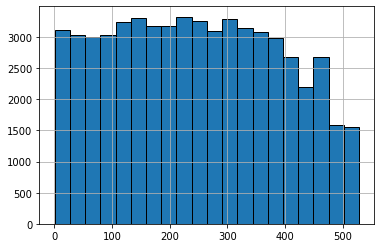

In [10]:
casecostprediction['kddati2'].hist(edgecolor='black', bins=20);

In [11]:
casecostprediction['peserta'].describe()

count    5.797100e+04
mean     3.562209e+05
std      4.120323e+05
min      8.000000e+00
25%      1.127735e+05
50%      1.975800e+05
75%      4.386935e+05
max      3.328509e+06
Name: peserta, dtype: float64

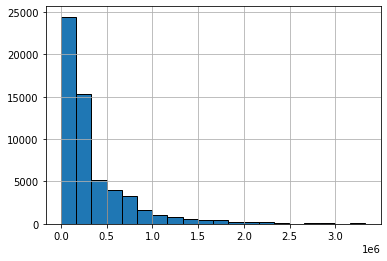

In [12]:
casecostprediction['peserta'].hist(edgecolor='black', bins=20);

In [13]:
casecostprediction['case'].describe()

count     57971.000000
mean       6539.418451
std       17607.280021
min           1.000000
25%         424.000000
50%        1359.000000
75%        4583.000000
max      333441.000000
Name: case, dtype: float64

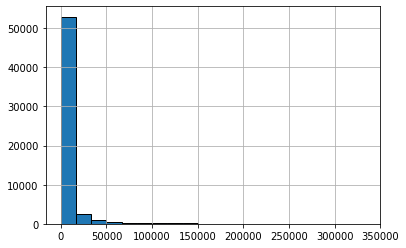

In [14]:
casecostprediction['case'].hist(edgecolor='black', bins=20);

In [15]:
casecostprediction['unit_cost'].describe()

count    5.797100e+04
mean     1.961092e+06
std      1.889367e+06
min      1.000000e+05
25%      2.336742e+05
50%      6.547994e+05
75%      3.531702e+06
max      2.690550e+07
Name: unit_cost, dtype: float64

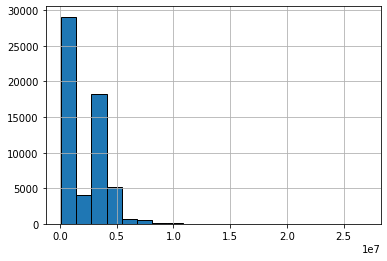

In [16]:
casecostprediction['unit_cost'].hist(edgecolor='black', bins=20);

#### Variabel Numerikal

In [17]:
casecostprediction[numerical_vars].describe()

,row_id,kddati2,peserta,a,b,c,cb,d,ds,gd,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
count,57971.000000,57971.000000,5.797100e+04,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.0,57971.000000,...,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,5.797100e+04
mean,28986.000000,246.423125,3.562209e+05,0.041538,0.388574,0.788894,0.000380,0.281710,0.0,0.046109,...,0.039899,0.004330,0.001829,0.004123,0.002018,0.228476,0.953028,0.644943,6539.418451,1.961092e+06
std,16734.930565,143.447935,4.120323e+05,0.210390,0.660382,0.679786,0.019477,0.595284,0.0,0.327766,...,0.210092,0.065659,0.042722,0.082443,0.044880,0.925357,2.225974,1.234201,17607.280021,1.889367e+06
min,1.000000,1.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+05
25%,14493.500000,125.000000,1.127735e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.000000,2.336742e+05
50%,28986.000000,243.000000,1.975800e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1359.000000,6.547994e+05
75%,43478.500000,362.000000,4.386935e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4583.000000,3.531702e+06
max,57971.000000,528.000000,3.328509e+06,2.000000,8.000000,6.000000,1.000000,5.000000,0.0,10.000000,...,2.000000,1.000000,1.000000,5.000000,1.000000,9.000000,25.000000,10.000000,333441.000000,2.690550e+07


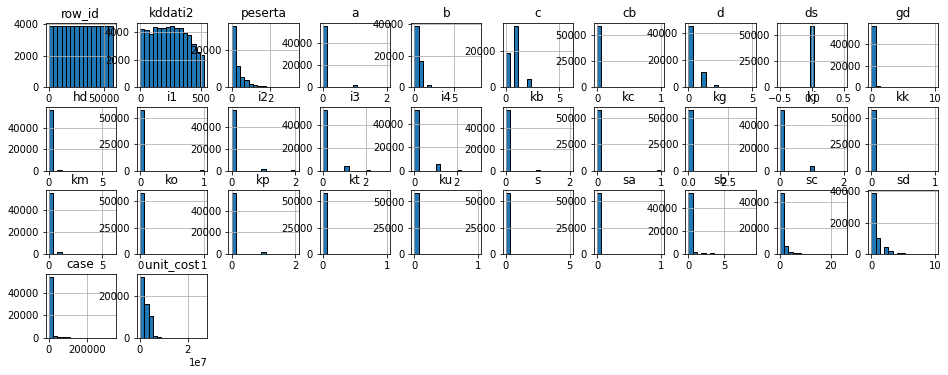

In [18]:
casecostprediction[numerical_vars].hist(edgecolor='black', bins=15, figsize=(16, 15), layout = (10, 10));

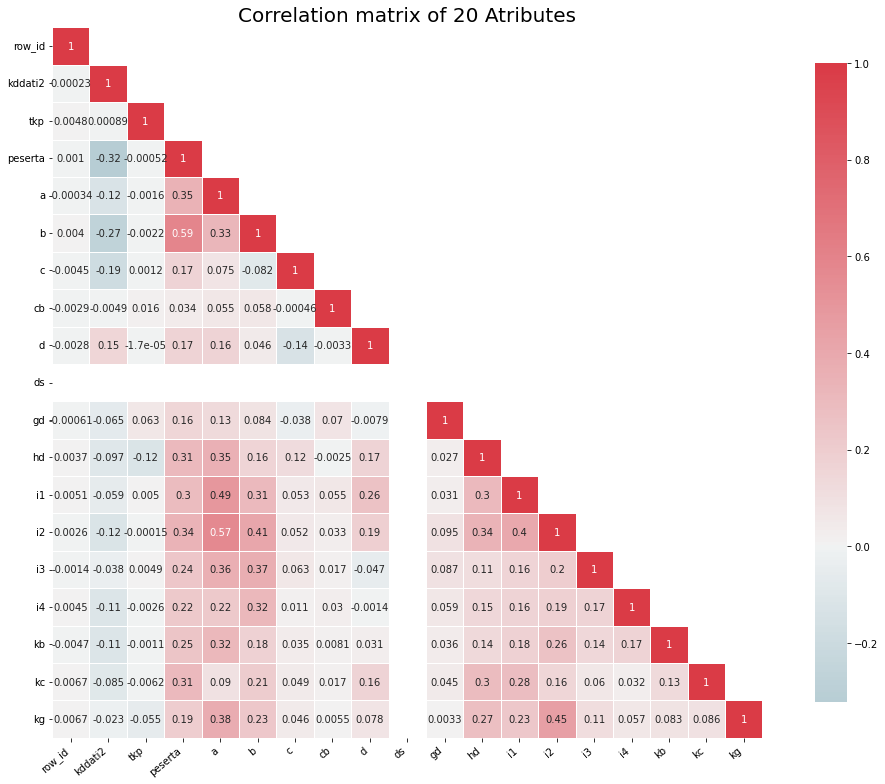

In [19]:
corr = casecostprediction.iloc[:,:20].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Correlation matrix of 20 Atributes', fontsize=20)
plt.tight_layout()